# Data Science Salaries Dataset

This dataset was aggregated from the ai-jobs.net Salaries, and can be obtained from the Kaggle website: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


## Content of the dataset as follows:

- **work_year** - The year the salary was paid.
- **experience_level** : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- **employment_type** : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- **job_title** : The role worked in during the year.
- **salary** : The total gross salary amount paid.
- **salary_currency** : The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd** : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence** : Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio** : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- **company_location** : The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size** : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

As Data Science positions have been on a steady rise in the past decade, I will use this dataset to explore the salaries in the domain during the COVID 19 pandemic.

**The structure of the notebook:**

+ Imports
+ Data
+ Basic EDA
    1. Missing Values
    2. Quantative Data
    3. Qualitative Data

## Potentialy Actionable insights

* Salary ranges between different positions analysis
* Salary increase/decrease during pandemic
* Relationship between remote/onsite work and salary ranges
* Relationship between the salary range in diffent coutries

## Usability for an end-user

* Potential for a streamlit app that predicts your DS salary based on job position, location

# Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# Data

In [13]:
#loading data

salaries = pd.read_csv('ds_salaries.csv', index_col=0)

# Basic EDA

In [14]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [15]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [16]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


### Missing Values

In [17]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', salaries.isnull().values.sum())
print('Percent of missing values per feature: ') 
salaries.isnull().sum() * 100 / len(salaries)

Number of missing values:  0
Percent of missing values per feature: 


work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

### 3.2 Quantative Data

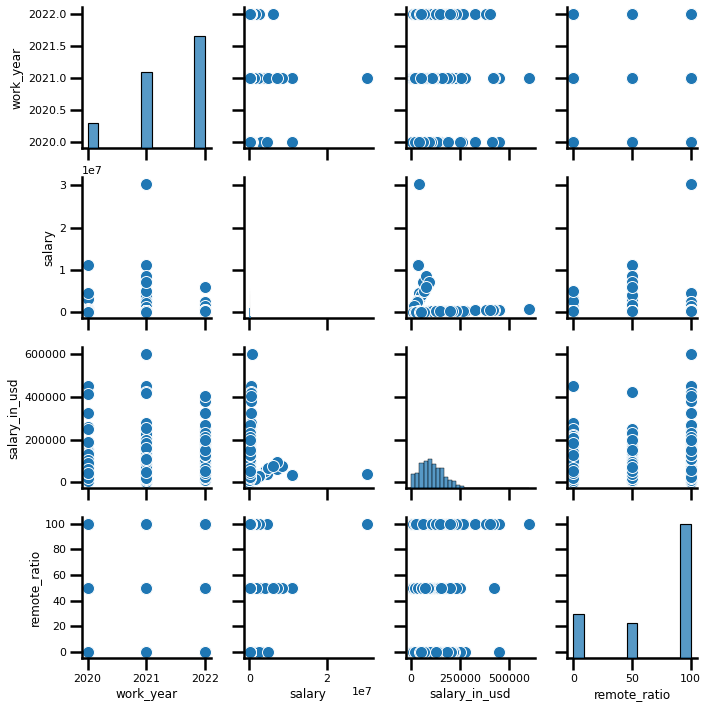

In [18]:
sns.pairplot(salaries[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']]);

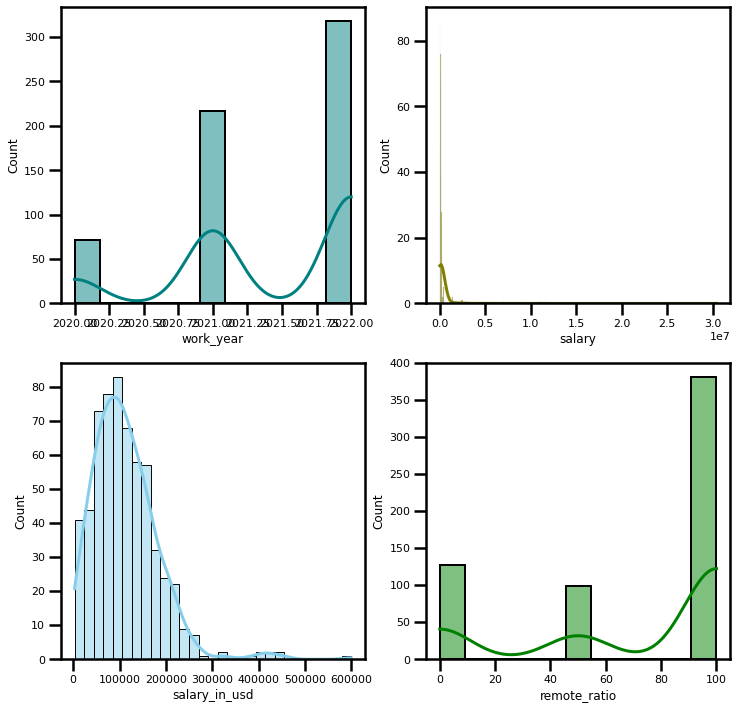

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data = salaries, x = "work_year", kde = True, color = "teal", ax = axs[0,0])
sns.histplot(data = salaries, x = "salary", kde = True, color = "olive", ax = axs[0,1])
sns.histplot(data = salaries, x = "salary_in_usd", kde = True, color = "skyblue", ax = axs[1,0])
sns.histplot(data = salaries, x = "remote_ratio", kde = True, color = "green", ax = axs[1,1])

plt.show();

### 3.3 Qualitative Data

In [25]:
salaries.select_dtypes(exclude='number')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M
603,SE,FT,Data Engineer,USD,US,US,M
604,SE,FT,Data Analyst,USD,US,US,M
605,SE,FT,Data Analyst,USD,US,US,M


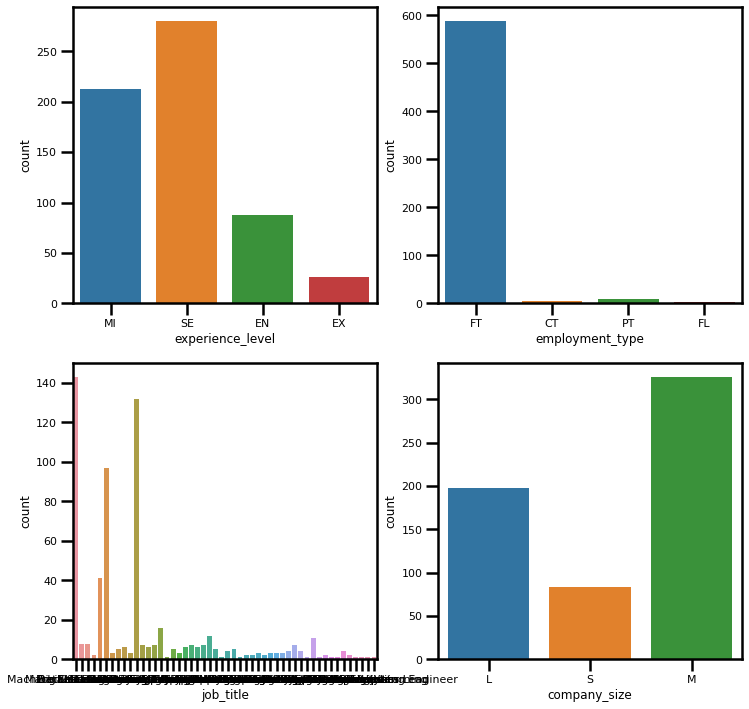

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.countplot(data = salaries, x = "experience_level", ax = axs[0,0])
sns.countplot(data = salaries, x = "employment_type", ax = axs[0,1])
sns.countplot(data = salaries, x = "job_title", ax = axs[1,0])
sns.countplot(data = salaries, x = "company_size", ax = axs[1,1])

plt.show();

In [35]:
salaries.value_counts('job_title')

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist        

In [42]:
salaries.value_counts('employee_residence')

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PK      6
BR      6
PT      6
NL      5
IT      4
PL      4
RU      4
TR      3
AE      3
VN      3
AT      3
AU      3
BE      2
SI      2
MX      2
RO      2
SG      2
NG      2
HU      2
DK      2
TN      1
CL      1
RS      1
UA      1
BG      1
PR      1
BO      1
CH      1
PH      1
NZ      1
EE      1
MY      1
DZ      1
MT      1
MD      1
LU      1
KE      1
CN      1
JE      1
CO      1
IR      1
AR      1
CZ      1
IE      1
HR      1
HN      1
HK      1
IQ      1
dtype: int64

In [43]:
salaries.value_counts('company_location')

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PL      4
PT      4
NL      4
AT      4
MX      3
LU      3
TR      3
PK      3
AE      3
AU      3
BR      3
DK      3
CN      2
CZ      2
BE      2
SI      2
RU      2
NG      2
IT      2
CH      2
NZ      1
CL      1
EE      1
SG      1
UA      1
RO      1
CO      1
MY      1
DZ      1
MT      1
MD      1
KE      1
IR      1
IQ      1
AS      1
IL      1
IE      1
HU      1
HR      1
HN      1
VN      1
dtype: int64